### 환경 설정

In [38]:
import selenium
from selenium import webdriver as wd
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from itertools import repeat
import re
import random
import sqlite3
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [42]:
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

### SQLite에서 데이터 다운받기

In [2]:
con = sqlite3.connect("db/song.db")

df = pd.read_sql("SELECT * FROM TOP100_all", con)

con.close()

df

,rank,artist_name,song_name,song_id
0,1,볼빨간사춘기,여행,31093710
1,2,방탄소년단,FAKE LOVE,31085237
2,3,여자친구 (GFRIEND),밤 (Time for the moon night),31052421
3,4,"로꼬, 화사 (Hwa Sa)",주지마,31035061
4,5,닐로(Nilo),지나오다,30699142
...,...,...,...,...
15895,96,이무진,신호등,33480898
15896,97,릴보이 (lIlBOI),"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",33115807
15897,98,순순희,서면역에서,32570501
15898,99,"청하, Colde (콜드)",내 입술 따뜻한 커피처럼,33552335


### 데이터 처리

In [3]:
name_list = list(set(df.artist_name))

score_board = pd.DataFrame({"artist_name" : name_list})
score_board['score'] = 0



df_score = df[df.columns]
df_score['score'] = 101 - df['rank']



for artist_name in score_board['artist_name'] :
    score_board.loc[(score_board['artist_name'] == artist_name), 'score'] = sum(df_score.loc[(df_score['artist_name'] == artist_name), 'rank'])
    
score_board = score_board.sort_values(by = ['score'], axis = 0, ascending = False)
score_board

new_rank = []
for i in range(1, len(score_board)+1) :
    new_rank.append(i)
    i += 1
    
score_board['new_rank'] = new_rank

score_board[:50]

,artist_name,score,new_rank
386,방탄소년단,80502,1
216,폴킴,26409,2
330,EXO,23147,3
137,아이유,22130,4
34,Wanna One (워너원),14928,5
213,볼빨간사춘기,11601,6
398,TWICE (트와이스),11255,7
197,BLACKPINK,9303,8
217,비투비,9056,9
170,태연 (TAEYEON),8355,10


In [6]:
df_song_info = pd.read_csv('./csv/song_info/song_info.csv')
df_song_info

,song_id,song_name,artist_name,album_name,release_date,genre
0,32163199,낙서 (Feat. 백예린) (Prod. by WOOGIE),펀치넬로 (punchnello),낙서,2019-11-11,랩/힙합
1,31399725,닿은 순간 (Ooh La La La),EXO,DON'T MESS UP MY TEMPO - The 5th Album,2018-11-02,댄스
2,32217924,춤 (Groove),EXO,OBSESSION - The 6th Album,2019-11-27,댄스
3,711627,죄와벌,SG 워너비,살다가,2005-03-23,발라드
4,31133898,너 없인 안 된다,비투비,THIS IS US,2018-06-18,발라드
...,...,...,...,...,...,...
1132,31417871,SOLO,제니 (JENNIE),SOLO,2018-11-12,랩/힙합
1133,31584299,잊지마요 (Feat. 박지훈),하성운,잊지마요,2019-01-28,발라드
1134,32872978,Dynamite,방탄소년단,Dynamite (DayTime Version),2020-08-24,댄스
1135,33265558,흑백사진 (2021) (바른연애 길잡이 X KCM),KCM,흑백사진 (2021) (바른연애 길잡이 X KCM),2021-02-06,발라드


In [17]:
df['album_name'] = np.nan
df['release_date'] = np.nan
df['genre'] = np.nan

df

,rank,artist_name,song_name,song_id,album_name,release_date,genre
0,1,볼빨간사춘기,여행,31093710,NaN,NaN,NaN
1,2,방탄소년단,FAKE LOVE,31085237,NaN,NaN,NaN
2,3,여자친구 (GFRIEND),밤 (Time for the moon night),31052421,NaN,NaN,NaN
3,4,"로꼬, 화사 (Hwa Sa)",주지마,31035061,NaN,NaN,NaN
4,5,닐로(Nilo),지나오다,30699142,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15895,96,이무진,신호등,33480898,NaN,NaN,NaN
15896,97,릴보이 (lIlBOI),"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",33115807,NaN,NaN,NaN
15897,98,순순희,서면역에서,32570501,NaN,NaN,NaN
15898,99,"청하, Colde (콜드)",내 입술 따뜻한 커피처럼,33552335,NaN,NaN,NaN


In [26]:
for i in range(len(df)) :
    df.loc[i, 'album_name'] = df_song_info.loc[(df_song_info['song_id'] == df.loc[i, 'song_id']), 'album_name'].values
    df.loc[i, 'release_date'] = df_song_info.loc[(df_song_info['song_id'] == df.loc[i, 'song_id']), 'release_date'].values
    df.loc[i, 'genre'] = df_song_info.loc[(df_song_info['song_id'] == df.loc[i, 'song_id']), 'genre'].values

In [27]:
df

,rank,artist_name,song_name,song_id,album_name,release_date,genre
0,1,볼빨간사춘기,여행,31093710,Red Diary Page.2,2018-05-24,"인디음악, 록/메탈"
1,2,방탄소년단,FAKE LOVE,31085237,LOVE YOURSELF 轉 'Tear',2018-05-18,랩/힙합
2,3,여자친구 (GFRIEND),밤 (Time for the moon night),31052421,여자친구 The 6th Mini Album 'Time for the moon night',2018-04-30,댄스
3,4,"로꼬, 화사 (Hwa Sa)",주지마,31035061,건반 위의 하이에나 Part.4,2018-04-21,발라드
4,5,닐로(Nilo),지나오다,30699142,About You,2017-10-31,발라드
...,...,...,...,...,...,...,...
15895,96,이무진,신호등,33480898,신호등,2021-05-14,록/메탈
15896,97,릴보이 (lIlBOI),"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",33115807,쇼미더머니 9 Episode 3,2020-12-05,랩/힙합
15897,98,순순희,서면역에서,32570501,서면역에서,2020-05-05,"발라드, 인디음악"
15898,99,"청하, Colde (콜드)",내 입술 따뜻한 커피처럼,33552335,내 입술 따뜻한 커피처럼,2021-06-08,발라드


In [37]:
df_genre_count = df['genre'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df_genre_count

,unique_values,counts
0,발라드,4245
1,댄스,2980
2,랩/힙합,2703
3,"발라드, 국내드라마",1293
4,POP,1211
5,R&B/Soul,1026
6,록/메탈,488
7,"발라드, 인디음악",378
8,"랩/힙합, 인디음악",228
9,"록/메탈, 국내드라마",217


### 장르별 출시량 확인

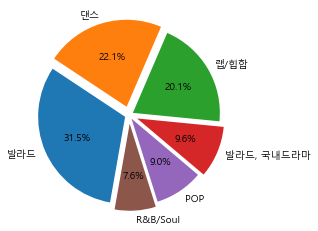

In [51]:
counts = list(df_genre_count['counts'][:6])
labels = list(df_genre_count['unique_values'][:6])
explode = [0.05, 0.10, 0.05, 0.10, 0.05, 0.10]


plt.pie(counts, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()